# Exploratory Data Analysis, OLS Regressions, and Results

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

In [2]:
#Load data
data = pd.read_csv('Data/stata_data.csv')
data.head()

,CI,ISF,NASDAQ,NYSE,Other,one_m_diff_volume,three_m_diff_volume,six_m_diff_volume,one_y_diff_volume,one_m_diff_shareprice,three_m_diff_shareprice,six_m_diff_shareprice,one_y_diff_shareprice
0,1,0,1,0,0,-27.602686,-28.601259,-12.906301,63.017803,8.876830,-14.281478,-17.272690,-36.492656
1,1,1,1,0,0,219.559358,-45.717575,150.587447,12.873300,-7.515141,-40.482228,-49.805155,-14.643252
2,0,0,0,1,0,-28.898357,23.709987,25.032663,43.315739,4.152021,-31.725230,-43.085234,-52.447342
3,0,1,0,1,0,-19.983171,247.877317,696.647198,544.352247,-23.834634,-89.095128,-95.190888,-69.921957
4,1,0,0,0,1,-96.741663,-94.926790,-98.501300,-94.113737,-7.085187,-17.569188,-20.093245,-33.146868


In [3]:
#Add Named Categorical Columns for CI, ISF, and Exchange for Graphs
data['Sharing Firm Introduced'] = np.where(data['ISF'] == 1, "Yes", "No")
data['Relatedness with Sharing Firm'] = np.where(data['CI'] == 1, "Closely Related", "Less Closely Related")
data['Exchange'] = data[['NASDAQ','NYSE','Other']].idxmax(axis=1)
data.head()

,CI,ISF,NASDAQ,NYSE,Other,one_m_diff_volume,three_m_diff_volume,six_m_diff_volume,one_y_diff_volume,one_m_diff_shareprice,three_m_diff_shareprice,six_m_diff_shareprice,one_y_diff_shareprice,Sharing Firm Introduced,Relatedness with Sharing Firm,Exchange
0,1,0,1,0,0,-27.602686,-28.601259,-12.906301,63.017803,8.876830,-14.281478,-17.272690,-36.492656,No,Closely Related,NASDAQ
1,1,1,1,0,0,219.559358,-45.717575,150.587447,12.873300,-7.515141,-40.482228,-49.805155,-14.643252,Yes,Closely Related,NASDAQ
2,0,0,0,1,0,-28.898357,23.709987,25.032663,43.315739,4.152021,-31.725230,-43.085234,-52.447342,No,Less Closely Related,NYSE
3,0,1,0,1,0,-19.983171,247.877317,696.647198,544.352247,-23.834634,-89.095128,-95.190888,-69.921957,Yes,Less Closely Related,NYSE
4,1,0,0,0,1,-96.741663,-94.926790,-98.501300,-94.113737,-7.085187,-17.569188,-20.093245,-33.146868,No,Closely Related,Other


In [4]:
#Create New Dataframes with Variables for Each Time Period
onemonthdata = data[['CI', 'ISF', 'NASDAQ', 'NYSE', 'Other', 'one_m_diff_volume', 'one_m_diff_shareprice','Sharing Firm Introduced', 'Relatedness with Sharing Firm', 'Exchange']]
threemonthdata = data[['CI', 'ISF', 'NASDAQ', 'NYSE', 'Other', 'three_m_diff_volume', 'three_m_diff_shareprice','Sharing Firm Introduced', 'Relatedness with Sharing Firm', 'Exchange']]
sixmonthdata = data[['CI', 'ISF', 'NASDAQ', 'NYSE', 'Other', 'six_m_diff_volume', 'six_m_diff_shareprice','Sharing Firm Introduced', 'Relatedness with Sharing Firm', 'Exchange']]
oneyeardata = data[['CI', 'ISF', 'NASDAQ', 'NYSE', 'Other', 'one_y_diff_volume', 'one_y_diff_shareprice','Sharing Firm Introduced', 'Relatedness with Sharing Firm', 'Exchange']]

## Regression Analysis for t = One Month
### Exploratory Data Analysis

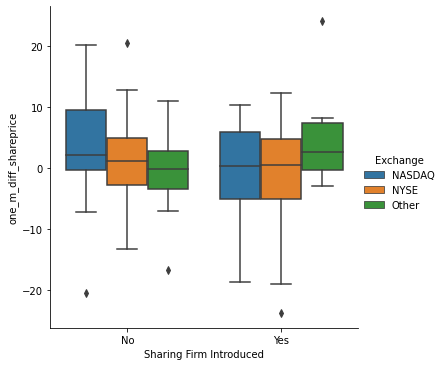

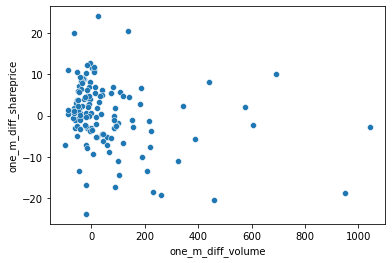

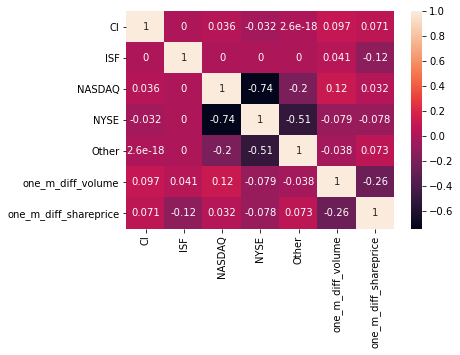

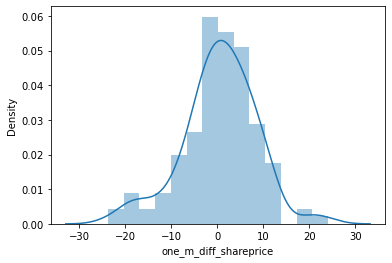

In [5]:
CATsvsOneM = sns.catplot(x="Sharing Firm Introduced", y="one_m_diff_shareprice",hue='Exchange',kind='box',data=onemonthdata)
plt.show()
VolumevsOneM = sns.scatterplot(x="one_m_diff_volume", y="one_m_diff_shareprice",data=onemonthdata)
plt.show()
OneMHeatmap = sns.heatmap(onemonthdata.loc[:,'CI':'one_m_diff_shareprice'].corr(),annot=True)
plt.show()
OneMDistofSharePriceDiff = sns.distplot(onemonthdata['one_m_diff_shareprice'])
plt.show()

### OLS Regression

In [6]:
onemresult1 = sm.ols(formula="one_m_diff_shareprice ~ CI + ISF + NASDAQ + NYSE + one_m_diff_volume", data=onemonthdata).fit(cov_type='HC1')
print(onemresult1.summary())

                              OLS Regression Results                             
Dep. Variable:     one_m_diff_shareprice   R-squared:                       0.098
Model:                               OLS   Adj. R-squared:                  0.062
Method:                    Least Squares   F-statistic:                     2.028
Date:                   Tue, 23 Feb 2021   Prob (F-statistic):             0.0790
Time:                           03:45:45   Log-Likelihood:                -456.05
No. Observations:                    132   AIC:                             924.1
Df Residuals:                        126   BIC:                             941.4
Df Model:                              5                                         
Covariance Type:                     HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercep

### Residual Plots

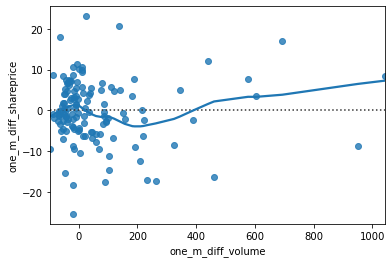

In [7]:
OneMResidvsVolume = sns.residplot(x='one_m_diff_volume',y='one_m_diff_shareprice',data=onemonthdata, robust=True, lowess=True)

### Results

## Regression Analysis for t = Three Months
### Exploratory Data Analysis

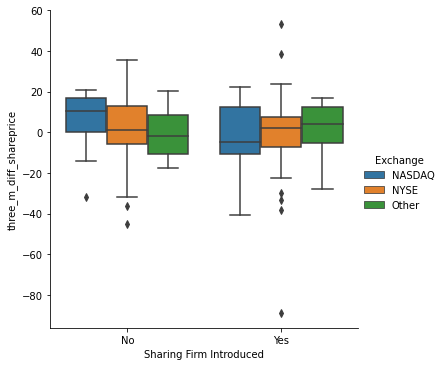

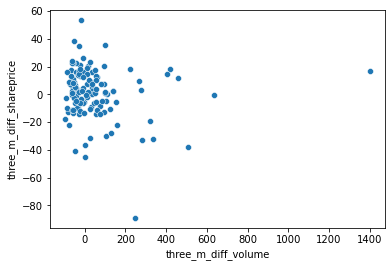

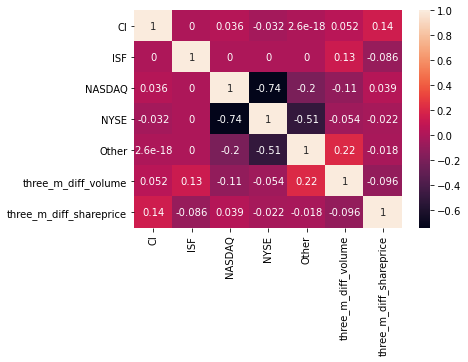

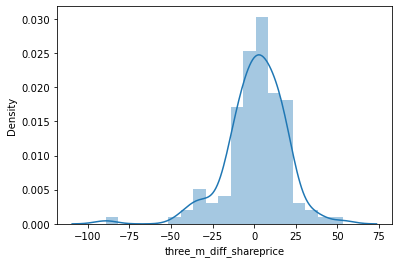

In [8]:
CATsvsThreeM = sns.catplot(x="Sharing Firm Introduced", y="three_m_diff_shareprice",hue='Exchange',kind='box',data=threemonthdata)
plt.show()
VolumevsThreeM = sns.scatterplot(x="three_m_diff_volume", y="three_m_diff_shareprice",data=threemonthdata)
plt.show()
ThreeMHeatmap = sns.heatmap(threemonthdata.loc[:,'CI':'three_m_diff_shareprice'].corr(),annot=True)
plt.show()
ThreeMDistofSharePriceDiff = sns.distplot(threemonthdata['three_m_diff_shareprice'])
plt.show()

### OLS Regression

In [9]:
threemresult1 = sm.ols(formula="three_m_diff_shareprice ~ CI + ISF + NASDAQ + NYSE + three_m_diff_volume", data=threemonthdata).fit(cov_type='HC1')
print(threemresult1.summary())

                               OLS Regression Results                              
Dep. Variable:     three_m_diff_shareprice   R-squared:                       0.037
Model:                                 OLS   Adj. R-squared:                 -0.001
Method:                      Least Squares   F-statistic:                    0.8396
Date:                     Tue, 23 Feb 2021   Prob (F-statistic):              0.524
Time:                             03:45:48   Log-Likelihood:                -565.44
No. Observations:                      132   AIC:                             1143.
Df Residuals:                          126   BIC:                             1160.
Df Model:                                5                                         
Covariance Type:                       HC1                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------

### Residual Plots

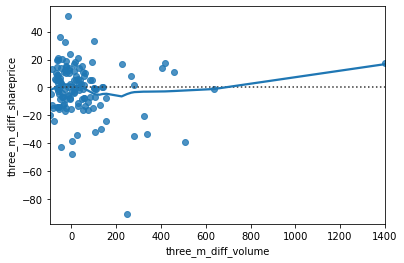

In [10]:
ThreeMResidvsVolume = sns.residplot(x='three_m_diff_volume',y='three_m_diff_shareprice',data=threemonthdata, robust=True, lowess=True)

### Results

## Regression Analysis for t = Six Months
### Exploratory Data Analysis

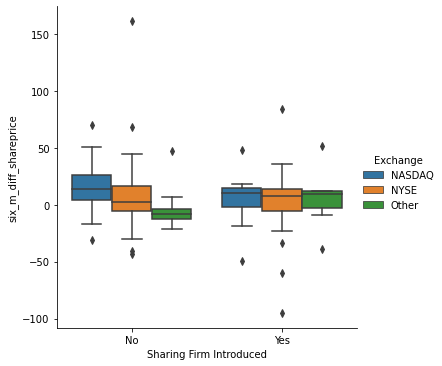

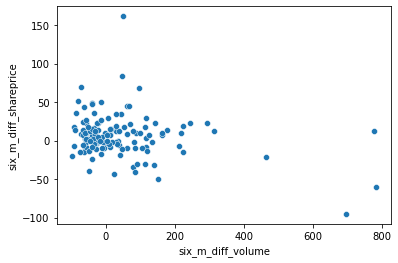

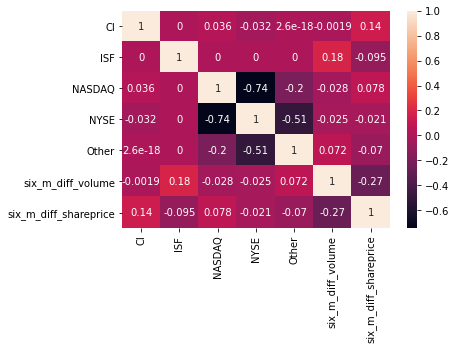

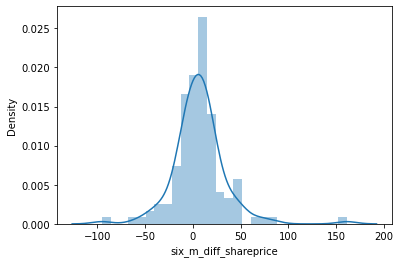

In [11]:
CATsvsSixM = sns.catplot(x="Sharing Firm Introduced", y="six_m_diff_shareprice",hue='Exchange',kind='box',data=sixmonthdata)
plt.show()
VolumevsSixM = sns.scatterplot(x="six_m_diff_volume", y="six_m_diff_shareprice",data=sixmonthdata)
plt.show()
SixMHeatmap = sns.heatmap(sixmonthdata.loc[:,'CI':'six_m_diff_shareprice'].corr(),annot=True)
plt.show()
SixMDistofSharePriceDiff = sns.distplot(sixmonthdata['six_m_diff_shareprice'])
plt.show()

### OLS Regression

In [12]:
sixmresult1 = sm.ols(formula="six_m_diff_shareprice ~ CI + ISF + NASDAQ + NYSE + six_m_diff_volume", data=sixmonthdata).fit(cov_type='HC1')
print(sixmresult1.summary())

                              OLS Regression Results                             
Dep. Variable:     six_m_diff_shareprice   R-squared:                       0.101
Model:                               OLS   Adj. R-squared:                  0.065
Method:                    Least Squares   F-statistic:                     1.757
Date:                   Tue, 23 Feb 2021   Prob (F-statistic):              0.126
Time:                           03:45:50   Log-Likelihood:                -617.76
No. Observations:                    132   AIC:                             1248.
Df Residuals:                        126   BIC:                             1265.
Df Model:                              5                                         
Covariance Type:                     HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercep

### Residual Plots

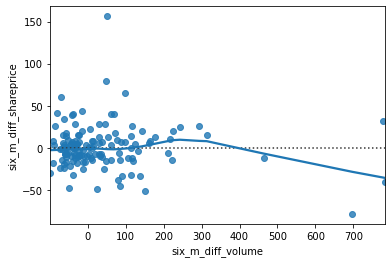

In [13]:
SixMResidvsVolume = sns.residplot(x='six_m_diff_volume',y='six_m_diff_shareprice',data=sixmonthdata, robust=True, lowess=True)

### Results

## Regression Analysis for t = One Year
### Exploratory Data Analysis

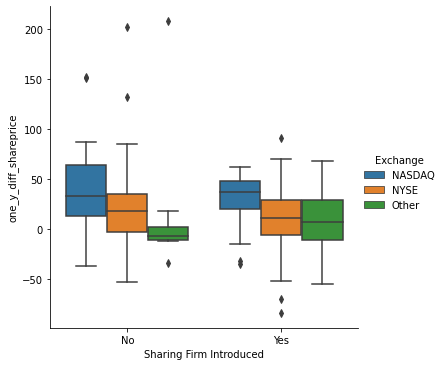

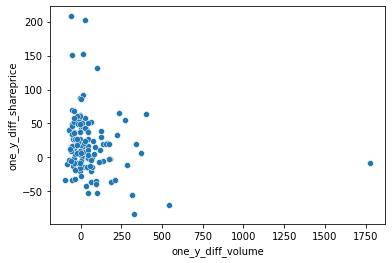

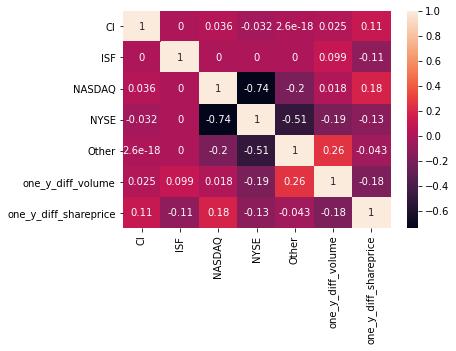

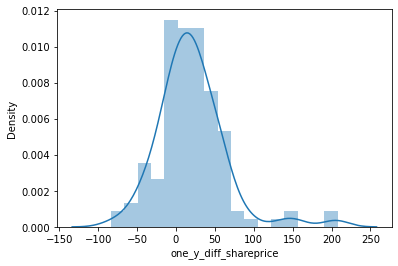

In [14]:
CATsvsOneY = sns.catplot(x="Sharing Firm Introduced", y="one_y_diff_shareprice",hue='Exchange',kind='box',data=oneyeardata)
plt.show()
VolumevsOneY = sns.scatterplot(x="one_y_diff_volume", y="one_y_diff_shareprice",data=oneyeardata)
plt.show()
OneYHeatmap = sns.heatmap(oneyeardata.loc[:,'CI':'one_y_diff_shareprice'].corr(),annot=True)
plt.show()
OneYDistofSharePriceDiff = sns.distplot(oneyeardata['one_y_diff_shareprice'])
plt.show()

### OLS Regression

In [15]:
oneyresult1 = sm.ols(formula="one_y_diff_shareprice ~ CI + ISF + NASDAQ + NYSE + one_y_diff_volume", data=oneyeardata).fit(cov_type='HC1')
print(oneyresult1.summary())

                              OLS Regression Results                             
Dep. Variable:     one_y_diff_shareprice   R-squared:                       0.091
Model:                               OLS   Adj. R-squared:                  0.055
Method:                    Least Squares   F-statistic:                     1.972
Date:                   Tue, 23 Feb 2021   Prob (F-statistic):             0.0872
Time:                           03:45:53   Log-Likelihood:                -680.52
No. Observations:                    132   AIC:                             1373.
Df Residuals:                        126   BIC:                             1390.
Df Model:                              5                                         
Covariance Type:                     HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercep

### Residual Plots

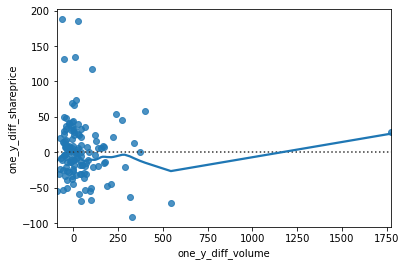

In [16]:
OneYResidvsVolume = sns.residplot(x='one_y_diff_volume',y='one_y_diff_shareprice',data=oneyeardata, robust=True, lowess=True)

### Results